In [1]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

def derivar(equation, variable):
    diff_eq = sp.diff(equation, variable)
    return diff_eq

***METODO ESTANDAR/TAYLOR***
---



◼Método 1: Geometria

In [2]:
#Datos medidos de forma directa(mm):
radio_cilindro = np.array([3.04, 3.04, 3.00, 3.10, 3.04, 3.04, 3.030, 3.050, 3.030, 3.040, 3.040, 3.050, 3.030, 3.05, 3.05, 3.06, 3.06,3.07])
altura_cilindro = np.array([62.10,62.16,62.16,62.16,62.14,62.14,62.18,62.16,62.14,62.20,62.18,62.16,62.18,62.12, 62.10, 62.16,62.14,62.20])
apotema = np.array([9.55, 9.55, 9.5, 9.55, 9.55, 9.5, 9.5, 9.5, 9.51, 9.5, 9.53, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.4, 9.5, 9.51])

#Promedios de los datos obtenidos anteriormente:
_radio_promedio = np.mean(radio_cilindro)
_altura_promedio = np.mean(altura_cilindro)
_apotema_promedio = np.mean(apotema)
_pi = 3.14
_sqrt3 = 1.73

#Calculo su varianza:
var_radio_cilindro = np.std(radio_cilindro, ddof=0)
var_altura_cilindro = np.std(altura_cilindro, ddof=0)
var_apotema = np.std(apotema, ddof=0)
var_pi = 0.0015926536
var_sqrt3 = 0.0020508076

#Calculo derivadas:
sqrt_3 = math.sqrt(3)
radio_promedio, altura_promedio, apotema_promedio, sqrt3, pi = sp.symbols('_radio_promedio, _altura_promedio, _apotema_promedio, _sqrt3, _pi')
variables_geometricas = [radio_promedio, altura_promedio, apotema_promedio, sqrt3, pi]
metal_body_geometry = altura_promedio*(6*(apotema_promedio)**2/sqrt3 - pi*radio_promedio**2)
derivadas_geometricas_resuletas = []

for i in variables_geometricas:
    count = derivar(metal_body_geometry, i)
    derivadas_geometricas_resuletas.append(count)

derivada_r = -2*_altura_promedio*_pi*_radio_promedio
derivada_h = 6*_apotema_promedio**2/_sqrt3 - _pi*_radio_promedio**2
derivada_ap = 12*_altura_promedio*_apotema_promedio/_sqrt3
derivada_sqrt3 = -6*_altura_promedio*_apotema_promedio**2/_sqrt3**2
derivada_pi = -_altura_promedio*_radio_promedio**2

#Propagacion de error
propagacion_error_sin_raiz = (var_radio_cilindro**2)*(derivada_r**2) + (derivada_h**2)*(var_altura_cilindro**2) + (derivada_ap**2)*(var_apotema**2) + (derivada_sqrt3**2)*(var_sqrt3**2) + (var_pi**2)*(derivada_pi**2)
propr_raiz = np.sqrt(propagacion_error_sin_raiz)

volumen_promed = _altura_promedio*(6*(_apotema_promedio)**2/_sqrt3 - _pi*_radio_promedio**2)
print(f'varianzas= {var_radio_cilindro}(var del radio); {var_altura_cilindro}(var de la altura); {var_apotema}(var de la apotema)')
print(f'La propagacion de errores es = {propr_raiz} mm3')
print(f'EL volumen promedio es = {volumen_promed} mm3')


varianzas= 0.019782770905294306(var del radio); 0.0281310864470493(var de la altura); 0.031603006186121066(var de la apotema)
La propagacion de errores es = 133.91012382566137 mm3
EL volumen promedio es = 17675.195743468386 mm3


◼Método 2: Desplazamiento del agua

In [3]:
#Datos obtenidos de forma directa(ml):
volumen_sin_desplazar = np.array([60, 61, 80, 68, 63, 50, 47, 45, 65, 66, 71, 63, 62, 57, 59, 43, 55, 42, 66])
Volumen_desplazado = np.array([77, 79, 97, 85, 80, 67, 64, 62, 83, 84, 88, 80, 79, 74, 76, 61, 72, 61, 84])
dif_vsd = Volumen_desplazado - volumen_sin_desplazar

#Promedios de los datos obtenidos anteriormente:
vsd_promedio = np.mean(volumen_sin_desplazar)
vd_promedio = np.mean(Volumen_desplazado)
dif_promedio = np.mean(dif_vsd)

#Calculo su varianza:
var_volumen_sin_desplazar = np.std(volumen_sin_desplazar, ddof=0)
var_Volumen_desplazado = np.std(Volumen_desplazado, ddof=0)
var_difvolumen= np.std(dif_vsd,ddof=0)

#Calculo sus derivadas:
vd, vsd = sp.symbols('vd, vsd')
arquimedes_variables = [vd, vsd]
cuerpo_arquimedes = vd - vsd
derivadas_arquimedes = []

for i in arquimedes_variables:
    count = derivar(cuerpo_arquimedes, i)
    derivadas_arquimedes.append(count)

#Propagacion de error:
prop_error_m2_sin_raiz = (var_volumen_sin_desplazar**2) + (var_Volumen_desplazado**2)
prop_error_m2 = np.sqrt(prop_error_m2_sin_raiz)
print(f'La propagacion de error a la cual llegamos es considerablemente alto: {prop_error_m2} cm3, a causa de que los sigmas de cada una de las variables es muy elevado por lo explicado en el texto de abajo')
volumen_m2_promedio = vd_promedio - vsd_promedio
print(f'Volumen promedio del cuerpo= {volumen_m2_promedio} cm3')


La propagacion de error a la cual llegamos es considerablemente alto: 13.788871019373545 cm3, a causa de que los sigmas de cada una de las variables es muy elevado por lo explicado en el texto de abajo
Volumen promedio del cuerpo= 17.368421052631575 cm3




> El objetivo de la medicion era tomar los valores indirectamente, a partir de definir un valor inicial para el volumen, nosotros operamos de manera distinta lo que ocasiono que llevaramos a cabo un experimento diferente al deseado, ya que no podemos definir una variable ni una varianza genuina para la propagacion de errores porque no partimos intencionalmente desde un valor inicial. Por ende, acabamos por hacer una medicion directa con la diferencia de volumenes, el cual no depende de ninguna variable.


◼Método 3: Densidad

In [4]:
#Datos obtenidos de la masa(g):
masa = np.array([ 48.34, 48.33, 48.34, 48.33, 48.32, 48.32, 48.33, 48.32, 48.32, 48.34, 48.32, 48.33, 48.34, 48.30, 48.30, 48.35, 48.36, 48.31, 48.32, 48.34])

#Promedio de la masa:
_masa_promedio = np.mean(masa)
_rho = 2.702

#Calculo su varianza:
var_masa = np.std(masa, ddof=0)
var_rho = 0.005
print(f'varianza de la masa= {var_masa} y la varianza de la densidad = {var_rho}')

#Calculo sus derivadas:
m, rho = sp.symbols('m, rho')
densidad_variables = [m ,rho]
cuerpo_densidad = m/rho
derivadas_densidad = []

for i in densidad_variables:
    count = derivar(cuerpo_densidad, i)
    derivadas_densidad.append(count)

derivada_masa = 1/_rho
derivada_densidad = -(_masa_promedio)/(_rho**2)

prop_error_sr_m3 = (derivada_masa**2)*(var_masa**2) + (derivada_densidad**2)*(var_rho**2)

#Propagacion de error:
prop_error_m3 = np.sqrt(prop_error_sr_m3)
print(f'\nLa propagacion de error es = {prop_error_m3} cm3')
volumen_prom_m3= _masa_promedio/_rho
print(f'El volumen promedio = {volumen_prom_m3} cm3')
print(f'\nVarianzas= {var_masa}; {var_rho} (ya dada por la densidad)')

varianza de la masa= 0.015033296378373936 y la varianza de la densidad = 0.005

La propagacion de error es = 0.03356210462853695 cm3
El volumen promedio = 17.886010362694304 cm3

Varianzas= 0.015033296378373936; 0.005 (ya dada por la densidad)


***METODO MONTE CARLO***
---



◼Método 1: Geometria

In [5]:
N = int(1000000)

h_mc = _altura_promedio + var_altura_cilindro*np.random.randn(N)

r_mc = _radio_promedio + var_radio_cilindro*np.random.randn(N)

ap_mc = _apotema_promedio + var_apotema*np.random.randn(N)

raiz_mc= _sqrt3 + var_sqrt3*np.random.randn(N)

pi_mc = _pi + var_pi*np.random.randn(N)

#Calculamos promedios:
h_mc_media = np.mean(h_mc)
r_mc_media = np.mean(r_mc)
ap_mc_media = np.mean(ap_mc)
raiz_mc_media = np.mean(raiz_mc)
pi_mc_media = np.mean(pi_mc)

volumen_mc_media= h_mc_media*(6*(ap_mc_media)**2/raiz_mc_media - pi_mc_media*r_mc_media**2)
volumen_mc= h_mc*(6*(ap_mc)**2/raiz_mc - pi_mc*r_mc**2)
sigma_volumen_mc= np.std(volumen_mc)

print(f'La propagacion de error hecho con el metodo monte carlo es = {sigma_volumen_mc}')

La propagacion de error hecho con el metodo monte carlo es = 134.05883151324673


In [6]:
volumen_mc_media

17675.016080819463

In [7]:
np.mean(volumen_mc)

17675.18301955562

In [8]:
def gauss(x):
    media = np.mean(x)
    producto_gauss = 1 / ((np.sqrt(2*np.pi)) * np.std(x))
    exp_gauss = -(x - media)**2 / (2*(np.std(x))**2)
    return producto_gauss*np.exp(exp_gauss)

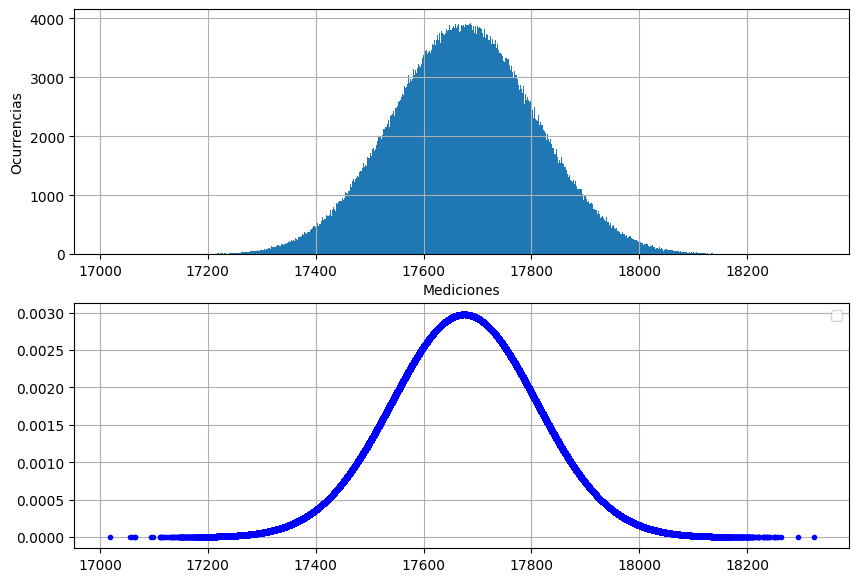

In [9]:
fig, ax = plt.subplots(2, figsize=(10,7))
ax[0].hist(volumen_mc,1000)
ax[0].set(ylabel='Ocurrencias', xlabel='Mediciones')
ax[0].grid()

ax[1].plot(volumen_mc, gauss(volumen_mc), 'b.')
ax[1].grid()

plt.legend()
plt.show()

◼Método 2: Desplazamiento del agua

In [10]:
#Medicion mal hecha

◼Método 3: Densidad

In [11]:
N = int(1000000)

m_mc = _masa_promedio + var_masa*np.random.randn(N)
rho_mc = _rho + var_rho*np.random.randn(N)

volumen_m3_mc = m_mc / rho_mc
var_volumen_m3_mc = np.std(volumen_m3_mc)

#Calculamos medias:
m_mc_media = np.mean(m_mc)
rho_mc_media = np.mean(rho_mc)
v_mc_m3_media = m_mc_media / rho_mc_media

print(f'La propagacion de error con el metodo monte carlo es = {var_volumen_m3_mc}')

La propagacion de error con el metodo monte carlo es = 0.033539899784185215


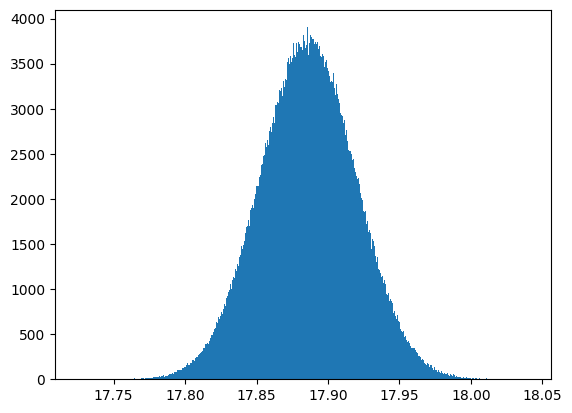

In [12]:
plt.hist(volumen_m3_mc,1000)
plt.show()

***Comparación de resultados***
---



◼Sigmas:

In [13]:
#metodo 1
print('Método 1:')
print("Sigma via propagacion metodo estandar   :",propr_raiz )
print("Sigma via propagacion metodo Monte Carlo:", sigma_volumen_mc)

#metodo 2
#NO HAY CONCLUSION

#metodo 3
print('\nMétodo 3:')
print("Sigma via propagacion metodo estandar   :",prop_error_m3 )
print("Sigma via propagacion metodo Monte Carlo:",var_volumen_m3_mc)

Método 1:
Sigma via propagacion metodo estandar   : 133.91012382566137
Sigma via propagacion metodo Monte Carlo: 134.05883151324673

Método 3:
Sigma via propagacion metodo estandar   : 0.03356210462853695
Sigma via propagacion metodo Monte Carlo: 0.033539899784185215


◼Resultados:

In [14]:
#Metodo 1
print('Método 1:')
print(f'({volumen_promed} +- {propr_raiz})mm3 ---> Método estandar')
print(f'({volumen_mc_media} +- {sigma_volumen_mc}) mm3 ---> Método Monte Carlo')

#metodo 3
print('\nMétodo 2:')
print(f'({volumen_prom_m3}) +- {prop_error_m3}) cm3 ---> Metodo estandar')
print(f'({v_mc_m3_media} +- {var_volumen_m3_mc}) cm3 ---> Metodo Monte Carlo ')

Método 1:
(17675.195743468386 +- 133.91012382566137)mm3 ---> Método estandar
(17675.016080819463 +- 134.05883151324673) mm3 ---> Método Monte Carlo

Método 2:
(17.886010362694304) +- 0.03356210462853695) cm3 ---> Metodo estandar
(17.886059751845348 +- 0.033539899784185215) cm3 ---> Metodo Monte Carlo 




---


Dejamos en claro las varianzas en cada forma de medicion para poder evaluar como afecta en cada metodo la propagacion de errores, aunque notamos que ambos metodos se acercan bastante entre si, por ende las varianzas son aproximables para el metodo de taylor por sus polinomios de primer grado, porque sus desviaciones son relativamente pequeñas.


---

